<a href="https://colab.research.google.com/github/dehpour/magnetobaryogenesis/blob/main/2211.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import scipy.integrate as inte 

#va = sorate dar emtedad a
#vb = sorate dar emtedad b
#Bz = meydan magnetic dar emtedad z
#Ba = meydan dar emtedad a
#Bb = medyan dar emtedad b
#x = t/t_ew
#yR = assymetry lepton right
#yB = assymetry baryoun (yani hame quarks)
def S2(x,u):
    Bz,Ba1,Ba2,Ba3,Bb1,Bb2,Bb3,yR,vz,va1,va2,va3,vb1,vb2,vb3=u
    #table 1
    alpha1=10**-7
    alpha2=5*10**-7
    alpha3=10**-6
    Gam0 = 121

    dyR = -(4.095017*10**-37)*x**(3/2)*yR*(Ba1**2+Ba2**2+Ba3**2+Bb1**2+Bb2**2+Bb3**2+Bz**2) \
          +(alpha1*968538584*10**-39)*x**(3/2)*(Ba1**2+Bb1**2) \
          +(alpha2*968538584*10**-39)*x**(3/2)*(Ba2**2+Bb2**2) \
          +(alpha3*968538584*10**-39)*x**(3/2)*(Ba3**2+Bb3**2) \
          -(alpha1*990462745*10**-21)*x**(1/2)*yR**2*(va1*Ba1+vb1*Bb1) \
          -(alpha2*990462745*10**-21)*x**(1/2)*yR**2*(va2*Ba2+vb2*Bb2) \
          -(alpha3*990462745*10**-21)*x**(1/2)*yR**2*(va3*Ba3+vb3*Bb3) \
          +Gam0*((1-x)/np.sqrt(x))*(147817048*10**-8)*yR

    dBz = -Bz/x

    dBa1 = (alpha1*356*10**13)*x**(-1/2)*(vb1*Bz-Bb1*vz)+(alpha1**2*356*10**11)*x**(-1/2)*Ba1 \
          +(alpha1**2)*(364058638*10**31)*x**(-3/2)*yR**2*va1 \
          +(alpha1*470369037*10**5)*x**(-1/2)*yR*Ba1-Ba1/x
    
    dBa2 = (alpha2*356*10**13)*x**(-1/2)*(vb2*Bz-Bb2*vz)+(alpha2**2*356*10**11)*x**(-1/2)*Ba2 \
          +(alpha2**2)*(364058638*10**31)*x**(-3/2)*yR**2*va2 \
          +(alpha2*470369037*10**5)*x**(-1/2)*yR*Ba2-Ba2/x
    
    dBa3 = (alpha3*356*10**13)*x**(-1/2)*(vb3*Bz-Bb3*vz)+(alpha3**2*356*10**11)*x**(-1/2)*Ba3 \
          +(alpha3**2)*(364058638*10**31)*x**(-3/2)*yR**2*va3 \
          +(alpha3*470369037*10**5)*x**(-1/2)*yR*Ba3-Ba3/x

    dBb1 = (alpha1*356*10**13)*x**(-1/2)*(vz*Ba1-Bz*va1)+(alpha1**2*356*10**11)*x**(-1/2)*Bb1 \
          +(alpha1**2)*(364058638*10**31)*x**(-3/2)*yR**2*vb1 \
          +(alpha1*470369037*10**5)*x**(-1/2)*yR*Bb1-Bb1/x

    dBb2 = (alpha2*356*10**13)*x**(-1/2)*(vz*Ba2-Bz*va2)+(alpha2**2*356*10**11)*x**(-1/2)*Bb2 \
          +(alpha2**2)*(364058638*10**31)*x**(-3/2)*yR**2*vb2 \
          +(alpha2*470369037*10**5)*x**(-1/2)*yR*Bb2-Bb2/x
    
    dBb3 = (alpha3*356*10**13)*x**(-1/2)*(vz*Ba3-Bz*va3)+(alpha3**2*356*10**11)*x**(-1/2)*Bb3 \
          +(alpha3**2)*(364058638*10**31)*x**(-3/2)*yR**2*vb3 \
          +(alpha3*470369037*10**5)*x**(-1/2)*yR*Bb3-Bb3/x

    dvz = 0

    dva1 = (alpha1*76066594*10**-32)*x**(3/2)*Bb1*Bz \
          -(alpha1**2*1424*10**15)*x**(-1/2)*va1

    dva2 = (alpha2*76066594*10**-32)*x**(3/2)*Bb2*Bz \
          -(alpha2**2*1424*10**15)*x**(-1/2)*va2

    dva3 = (alpha3*76066594*10**-32)*x**(3/2)*Bb3*Bz \
          -(alpha3**2*1424*10**15)*x**(-1/2)*va3

    dvb1 =-(alpha1*76066594*10**-32)*x**(3/2)*Ba1*Bz \
          -(alpha1**2*1424*10**15)*x**(-1/2)*vb1

    dvb2 =-(alpha2*76066594*10**-32)*x**(3/2)*Ba2*Bz \
          -(alpha2**2*1424*10**15)*x**(-1/2)*vb2

    dvb3 =-(alpha3*76066594*10**-32)*x**(3/2)*Ba3*Bz \
          -(alpha3**2*1424*10**15)*x**(-1/2)*vb3    

    return np.array([dBz,dBa1,dBa2,dBa3,dBb1,dBb2,dBb3,dyR,dvz,dva1,dva2,dva3,dvb1,dvb2,dvb3])

Bz0,Ba10,Ba20,Ba30,Bb10,Bb20,Bb30,yR0,vz0,va10,va20,va30,vb10,vb20,vb30=10**19,0,0,0,0,0,0,0,0,1e-2,0,0,1e-2,0,0
S20=[Bz0,Ba10,Ba20,Ba30,Bb10,Bb20,Bb30,yR0,vz0,va10,va20,va30,vb10,vb20,vb30]

s= inte.solve_ivp(fun=S2,t_span=(1e-4,1),y0=S20,method='LSODA',rtol=5e-13,atol=1e-40) #t haman  hast x=t/t_ew

Bz,Ba1,Ba2,Ba3,Bb1,Bb2,Bb3,yR,vz,va1,va2,va3,vb1,vb2,vb3=s.y
x=s.t

By=(Ba1**2+Ba2**2+Ba3**2+Bb1**2+Bb2**2+Bb3**2+Bz**2)**(1/2)

nR = 3.55929 * 1e-7 * yR

s

  message: 'Unexpected istate in LSODA.'
     nfev: 72225
     njev: 1954
      nlu: 1954
      sol: None
   status: -1
  success: False
        t: array([0.0001    , 0.0001    , 0.0001    , ..., 0.00086426, 0.00086426,
       0.00086426])
 t_events: None
        y: array([[ 1.00000000e+19,  1.00000000e+19,  1.00000000e+19, ...,
         1.15705897e+18,  1.15705894e+18,  1.15705891e+18],
       [ 0.00000000e+00,  1.41421356e-34,  2.82842712e-34, ...,
         2.79052546e+42,  2.79276265e+42,  2.79500163e+42],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.00000000e-02,  1.00000000e-02,  1.00000000e-02, ...,
        -1.62841097e+17, -1.62971652e+17, -1.63102311e+17],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e

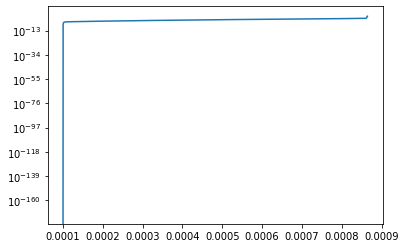

In [7]:
import matplotlib.pyplot as plt 
plt.plot(x,yR)
plt.yscale('log')
plt.show()